# IT Academy - Data Science with Python
## Sprint 12: Supervised Regressions
### [Github Supervised Regressions](https://github.com/jesussantana/Supervised-Regression)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Supervised-Regression.svg)](https://wakatime.com/badge/github/jesussantana/Supervised-Regression)

In [1]:
"""%pip install tabulate
%pip install scikit-optimize
%pip install fitter"""


'%pip install tabulate\n%pip install scikit-optimize\n%pip install fitter'

In [2]:
# Data treatment
# ==============================================================================
import numpy as np
import pandas as pd
import datetime
import time
from tabulate import tabulate

# # Graphics
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Preprocessing and modeling
# ==============================================================================
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from scipy import stats
from scipy.stats import ttest_1samp,ttest_ind
from scipy.stats import normaltest
from scipy.stats import f_oneway
from scipy.stats.mstats import gmean,hmean

from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

# Various
# ==============================================================================
import multiprocessing
import random as rd
from itertools import product
from fitter import Fitter, get_common_distributions

# Pandas configuration
# ==============================================================================
pd.set_option('display.max_columns', None)

# Matplotlib configuration
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Scripts folder configuration
# ==============================================================================
import sys
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

In [3]:
# Path folder configuration
# ===============================================================================

path = "../data/"
file = "processed/DelayedFlightsProcessed.csv"

df_raw = pd.read_csv(path + file)

### Exercise 1: 
  - Create at least three different regression models to try to best predict DelayedFlights.csv flight delay (ArrDelay).

### Exercise 2: 
  - Compare them based on MSE and R2.

### Exercise 3: 
  - Train them using the different parameters they support

### Exercise 4: 
  - Compare your performance using the traint / test approach or using all data (internal validation)

In [4]:
df = df_raw.copy()

## Exploratory analysis

In [5]:
df.head()

,ArrDelay,ArrTime,Distance,TaxiIn,TaxiOut,DayOfWeek,DepDelay,CarrierDelay,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,9.0,2104.0,737.0,3.0,9.0,4.0,22.0,16.72516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-3.0,1147.0,1438.0,18.0,13.0,4.0,7.0,16.72516,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.0,2118.0,1927.0,9.0,20.0,4.0,22.0,16.72516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.0,2201.0,989.0,6.0,14.0,1.0,16.0,16.72516,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.0,1329.0,1142.0,6.0,8.0,2.0,19.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ArrDelay          1937 non-null   float64
 1   ArrTime           1937 non-null   float64
 2   Distance          1937 non-null   float64
 3   TaxiIn            1937 non-null   float64
 4   TaxiOut           1937 non-null   float64
 5   DayOfWeek         1937 non-null   float64
 6   DepDelay          1937 non-null   float64
 7   CarrierDelay      1937 non-null   float64
 8   UniqueCarrier_9E  1937 non-null   float64
 9   UniqueCarrier_AA  1937 non-null   float64
 10  UniqueCarrier_AS  1937 non-null   float64
 11  UniqueCarrier_B6  1937 non-null   float64
 12  UniqueCarrier_CO  1937 non-null   float64
 13  UniqueCarrier_DL  1937 non-null   float64
 14  UniqueCarrier_EV  1937 non-null   float64
 15  UniqueCarrier_F9  1937 non-null   float64
 16  UniqueCarrier_FL  1937 non-null   float64


In [7]:
df.shape

(1937, 27)

In [8]:
df.isna().sum().sort_values()

ArrDelay            0
UniqueCarrier_WN    0
UniqueCarrier_US    0
UniqueCarrier_UA    0
UniqueCarrier_OO    0
UniqueCarrier_OH    0
UniqueCarrier_NW    0
UniqueCarrier_MQ    0
UniqueCarrier_HA    0
UniqueCarrier_FL    0
UniqueCarrier_F9    0
UniqueCarrier_EV    0
UniqueCarrier_XE    0
UniqueCarrier_DL    0
UniqueCarrier_B6    0
UniqueCarrier_AS    0
UniqueCarrier_AA    0
UniqueCarrier_9E    0
CarrierDelay        0
DepDelay            0
DayOfWeek           0
TaxiOut             0
TaxiIn              0
Distance            0
ArrTime             0
UniqueCarrier_CO    0
UniqueCarrier_YV    0
dtype: int64

In [9]:
type(df)

pandas.core.frame.DataFrame

## Distribution of the response variable

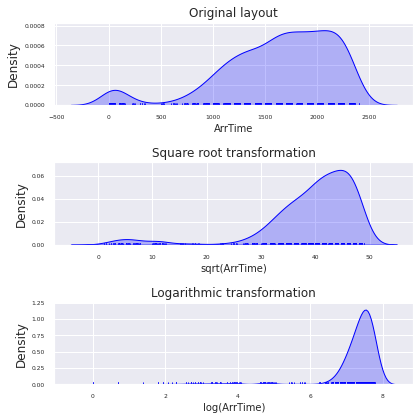

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    df.ArrTime,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original layout", fontsize = 'medium')
axes[0].set_xlabel('ArrTime', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.ArrTime),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(ArrTime)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.ArrTime),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logarithmic transformation", fontsize = 'medium')
axes[2].set_xlabel('log(ArrTime)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

## Identify which distribution the data best fit 

In [11]:
distributions = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

In [12]:
fitter = Fitter(df.ArrTime, distributions=distributions)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div
beta,0.000014,1637.716322,-36285.295290,inf
logistic,0.000016,1681.105137,-36090.400498,inf
powerlaw,0.000016,1616.598549,-36077.700797,inf
norm,0.000016,1663.520043,-36055.663672,inf
gamma,0.000016,1661.732523,-36006.077793,inf
chi2,0.000017,1659.008373,-35928.159899,inf
cauchy,0.000017,1708.306020,-35877.354822,inf
expon,0.000031,1629.751890,-34764.944876,inf
exponpow,0.000039,inf,-34307.244296,NaN


## Numerical variables

In [13]:
df.select_dtypes(include=['float64', 'int']).describe()

,ArrDelay,ArrTime,Distance,TaxiIn,TaxiOut,DayOfWeek,DepDelay,CarrierDelay,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
count,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000
mean,41.060104,1609.349896,761.491482,6.848861,18.018069,4.099639,41.994321,16.725160,0.025813,0.089313,0.027362,0.027362,0.053691,0.060403,0.041301,0.013939,0.032525,0.001033,0.072793,0.045947,0.021167,0.064533,0.073826,0.055240,0.200310,0.058854,0.034590
std,52.601884,550.238445,561.955819,5.291301,13.656356,2.017968,49.824272,29.668596,0.158618,0.285269,0.163178,0.163178,0.225466,0.238293,0.199037,0.117268,0.177434,0.032125,0.259863,0.209425,0.143977,0.245763,0.261554,0.228507,0.400335,0.235412,0.182785
min,-36.000000,1.000000,72.000000,1.000000,3.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1317.000000,354.000000,4.000000,10.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,1711.000000,606.000000,6.000000,14.000000,4.000000,24.000000,16.725160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.000000,2033.000000,987.000000,8.000000,21.000000,6.000000,51.000000,16.725160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,647.000000,2400.000000,3904.000000,98.000000,212.000000,7.000000,631.000000,631.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
"""# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrTime')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution Numerical Variable', fontsize = 10, fontweight = "bold")"""

'# Distribution graph for each numerical variable\n# ==============================================================================\n# Adjust number of subplots based on the number of columns\n\nfig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))\naxes = axes.flat\ncolumnas_numeric = df.select_dtypes(include=[\'float64\', \'int\']).columns\ncolumnas_numeric = columnas_numeric.drop(\'ArrTime\')\n\nfor i, colum in enumerate(columnas_numeric):\n    sns.histplot(\n        data    = df,\n        x       = colum,\n        stat    = "count",\n        kde     = True,\n        color   = (list(plt.rcParams[\'axes.prop_cycle\'])*2)[i]["color"],\n        line_kws= {\'linewidth\': 2},\n        alpha   = 0.3,\n        ax      = axes[i]\n    )\n    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")\n    axes[i].tick_params(labelsize = 6)\n    axes[i].set_xlabel("")\n    \n    \nfig.tight_layout()\nplt.subplots_adjust(top = 0.9)\nfig.suptitle(\'Distribution Numerical Variable\', fontsi

In [15]:
"""# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(4, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrTime')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['ArrTime'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"ArrTime vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    #if (i-1 >= len(columnas_numeric)-1): break

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con ArrTime', fontsize = 10, fontweight = "bold");"""

'# Distribution graph for each numerical variable\n# ==============================================================================\n# Adjust number of subplots based on the number of columns\nfig, axes = plt.subplots(nrows=3, ncols=3, figsize=(4, 5))\naxes = axes.flat\ncolumnas_numeric = df.select_dtypes(include=[\'float64\', \'int\']).columns\ncolumnas_numeric = columnas_numeric.drop(\'ArrTime\')\n\nfor i, colum in enumerate(columnas_numeric):\n    sns.regplot(\n        x           = df[colum],\n        y           = df[\'ArrTime\'],\n        color       = "gray",\n        marker      = \'.\',\n        scatter_kws = {"alpha":0.4},\n        line_kws    = {"color":"r","alpha":0.7},\n        ax          = axes[i]\n    )\n    axes[i].set_title(f"ArrTime vs {colum}", fontsize = 7, fontweight = "bold")\n    #axes[i].ticklabel_format(style=\'sci\', scilimits=(-4,4), axis=\'both\')\n    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())\n    axes[i].xaxis.set_major_formatter(ticker.Eng

In [16]:
# Matrix
X = df.iloc[:, 6].values.reshape((-1, 1))
# Vector
y = df.iloc[:, 0].values

- Divide the data set into training set and test set

In [17]:
"""from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [18]:
# Distribution of data in train and test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('ArrTime', axis = 'columns'),
                                        df['ArrTime'],
                                        train_size   = 0.8,
                                        random_state = 6858,
                                        shuffle      = True
                                    )

In [19]:
print(">>>Train partition")
print("-----------------------")
print(y_train.describe())

>>>Train partition
-----------------------
count    1549.000000
mean     1599.041575
std       560.462703
min         1.000000
25%      1313.000000
50%      1709.000000
75%      2027.000000
max      2400.000000
Name: ArrTime, dtype: float64


In [20]:
print("Test partition")
print("-----------------------")
print(y_test.describe())

Test partition
-----------------------
count     388.000000
mean     1650.503479
std       505.961448
min         7.000000
25%      1345.000000
50%      1718.500000
75%      2044.250000
max      2357.000000
Name: ArrTime, dtype: float64


In [21]:
# Selección de las variables por típo
# ==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                remainder='passthrough')

In [22]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [23]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [24]:
#Selección de las variables por típo
# ==============================================================================
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())
                        ]
                      )


# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[
                                ('imputer', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(handle_unknown='ignore'))
                            ]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [25]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [26]:
# Convert the output to a dataframe and add the name of the columns
# ==============================================================================

encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
              .get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
df_train_prep = preprocessor.transform(X_train)
df_train_prep = pd.DataFrame(df_train_prep, columns=labels)
df_train_prep.info()

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [27]:
from sklearn import set_config
set_config(display='diagram')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['ArrDelay', 'Distance', 'TaxiIn', 'TaxiOut',
                                  'DayOfWeek', 'DepDelay', 'CarrierDelay',
                                  'UniqueCarrier_9E', 'UniqueCarrier_AA',
                                  'UniqueCarrier_AS', 'UniqueCarrier_B6',
                                  'UniqueCarrier_CO', 'UniqueCarrier_DL',
                                  'UniqueCarrier_EV', 'UniqueCarrier_F9',
                                  'UniqueCarrier_FL', 'UniqueCarrier_HA',
                                  'UniqueCarrier_MQ', 'UniqueCarrier_NW',
                                  'UniqueCarrier_OH', 'UniqueCarrier_OO',
                                  'UniqueCarrier_UA', 'UniqueCarrier_US',
                                  'UniqueCarrier_WN', 'UniqueCarrier_XE',
                                  'UniqueCarrier_YV']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])

- Create Simple Linear Regression model with training set

- Linear regressions Internal, External

In [28]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Intern
regr_INT = linear_model.LinearRegression()
regr_INT.fit(X,y)
pred_INT = regr_INT.predict(X)
print("R2 Intern: %.4f" % r2_score(y, pred_INT))
print("MSE: %.4f" % mean_squared_error(y, pred_INT))

# Extern
regr_EXT = linear_model.LinearRegression()
regr_EXT.fit(X_train,y_train)
pred_EXT = regr_EXT.predict(X_test)
print("\nR2 Extern: %.4f" %  r2_score(y_test, pred_EXT))
print("MSE Extern: %.4f" %  mean_squared_error(y_test, pred_EXT))

R2 Intern: 0.8939
MSE: 293.3295

R2 Extern: 0.0093
MSE Extern: 252964.9621


- View training results

In [29]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regr_EXT.predict(X_train), color = "blue")
plt.title("Departure Delay vs Arrived Delay (Trainning Set)")
plt.xlabel("Departure Delay")
plt.ylabel("Arrived Delay")
plt.show()

ValueError: x and y must be the same size

## Multiple Linear Regression

In [30]:
# Matrix
X = df.iloc[:, :-1].values
# Vector
y = df.iloc[:, 0].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = regression.predict(X_test)

- Build the optimal RLM model

In [34]:
import statsmodels.api as sm

In [35]:
X_opt = X[:, [1, 2, 3, 4, 5, 6]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

X_opt = X[:, [1, 2, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

X_opt = X[:, [1, 2, 3, 4]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

X_opt = X[:, [1, 2, 3]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

X_opt = X[:, [1, 2]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.327
Model:                            OLS   Adj. R-squared (uncentered):              0.326
Method:                 Least Squares   F-statistic:                              470.3
Date:                Mon, 17 May 2021   Prob (F-statistic):                   3.52e-167
Time:                        12:59:20   Log-Likelihood:                         -10501.
No. Observations:                1937   AIC:                                  2.101e+04
Df Residuals:                    1935   BIC:                                  2.102e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0182      0.001     16.223      0.000       0.016       0.020
x2             0.0095      0.002      4.699      0.000       0.006       0.013
==============================================================================
Omnibus:                     1192.170   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15938.621
Skew:                           2.681   Prob(JB):                         0.00
Kurtosis:                      15.990   Cond. No.                         3.30
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Build the optimal RLM model using Automatic Backward Elimination

In [36]:
def backwardElimination(x, sl):    
    numVars = len(x[0])    
    for i in range(0, numVars):        
        regressor_OLS = sm.OLS(y, x.tolist()).fit()        
        maxVar = max(regressor_OLS.pvalues).astype(float)        
        if maxVar > sl:            
            for j in range(0, numVars - i):                
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):                    
                    x = np.delete(x, j, 1)    
        
    return x, regressor_OLS.summary()
 
SL = 0.05
X_opt = X[:, [1, 2, 3, 4, 5, 6]]
X_Modeled, summary = backwardElimination(X_opt, SL)

In [37]:
X_Modeled

array([[2.104e+03, 7.370e+02, 3.000e+00, 9.000e+00, 4.000e+00, 2.200e+01],
       [1.147e+03, 1.438e+03, 1.800e+01, 1.300e+01, 4.000e+00, 7.000e+00],
       [2.118e+03, 1.927e+03, 9.000e+00, 2.000e+01, 4.000e+00, 2.200e+01],
       ...,
       [1.917e+03, 1.008e+03, 4.000e+00, 2.300e+01, 4.000e+00, 8.300e+01],
       [2.228e+03, 9.570e+02, 3.000e+00, 9.000e+00, 3.000e+00, 1.300e+01],
       [1.403e+03, 7.810e+02, 3.000e+00, 2.200e+01, 2.000e+00, 1.500e+01]])

In [38]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                          1.016e+04
Date:                Mon, 17 May 2021   Prob (F-statistic):                        0.00
Time:                        12:59:20   Log-Likelihood:                         -7511.0
No. Observations:                1937   AIC:                                  1.503e+04
Df Residuals:                    1931   BIC:                                  1.507e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0056      0.000    -15.468      0.000      -0.006      -0.005
x2            -0.0062      0.000    -13.697      0.000      -0.007      -0.005
x3             0.7002      0.050     13.921      0.000       0.602       0.799
x4             0.7935      0.019     42.641      0.000       0.757       0.830
x5            -0.9900      0.116     -8.557      0.000      -1.217      -0.763
x6             0.9664      0.005    183.056      0.000       0.956       0.977
==============================================================================
Omnibus:                      196.719   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              606.337
Skew:                           0.514   Prob(JB):                    2.17e-132
Kurtosis:                       5.541   Cond. No.                         811.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## KFold

In [39]:
df = df.sample(frac=1).head(5000)

df = df.reset_index() # Importante resetear index al hacer seleccion aleatoria

X = df[["ArrTime", "Distance", "DepDelay"]]
y = df["ArrDelay"]

In [40]:
# Replicar el proceso anterior multiples veces 
from sklearn.model_selection import KFold 

kf = KFold(n_splits= 10, shuffle = True)  # particiones / mezcla de datos

kf.get_n_splits(X) # particiones concretas

10

In [41]:
# ajustar un modelo regresion lineal
#regr = linear_model.LinearRegression()
regr_INT = linear_model.LinearRegression()
regr_EXT = linear_model.LinearRegression()
resultados_Interno = []
resultados_Externo = []

for train_index, test_index in kf.split(X):  # indices
    X_train, X_test = X.loc[train_index,], X.loc[test_index] # objetos validacion externa
    y_train, y_test = y[train_index], y[test_index]
    """regr.fit(X_train, y_train)  #ajustar el modelo
    predicciones = regr.predict(X_test)  # prediciones test
    print("R2: %.4f" %  r2_score(y_test, predicciones))  # evaluar con test
    print("MSE: %.4f" %  mean_squared_error(y_test, predicciones))"""

    # Extern

    regr_EXT.fit(X_train,y_train)
    pred_EXT = regr_EXT.predict(X_test)
    print("\nR2 Extern: %.4f" %  r2_score(y_test, pred_EXT))
    print("MSE Extern: %.4f" %  mean_squared_error(y_test, pred_EXT))

    resultados_Externo.append(r2_score(y_test, pred_EXT))


"""for train_index, test_index in kf.split(X):  # indices
    X_train, X_test = X.loc[train_index,], X.loc[test_index] # objetos validacion externa
    y_train, y_test = y[train_index], y[test_index]"""

   



print("\nR2 medio: %.4f"% np.mean(resultados_Externo))

    # Intern

regr_INT.fit(X,y)
pred_INT = regr_INT.predict(X)
print("\nR2 Intern: %.4f" % r2_score(y, pred_INT))
print("MSE: %.4f" % mean_squared_error(y, pred_INT))

"""resultados_Interno.append(r2_score(y_test, pred_INT)) 

print("R2 medio: %.4f"% np.mean(resultados_Interno))"""


R2 Extern: 0.8958
MSE Extern: 257.6759

R2 Extern: 0.8532
MSE Extern: 360.8757

R2 Extern: 0.9360
MSE Extern: 178.1143

R2 Extern: 0.8311
MSE Extern: 483.3988

R2 Extern: 0.8940
MSE Extern: 297.1492

R2 Extern: 0.9004
MSE Extern: 316.5443

R2 Extern: 0.8793
MSE Extern: 232.0716

R2 Extern: 0.8594
MSE Extern: 228.3104

R2 Extern: 0.9396
MSE Extern: 366.3709

R2 Extern: 0.8541
MSE Extern: 196.9098

R2 medio: 0.8843

R2 Intern: 0.8950
MSE: 290.4789


'resultados_Interno.append(r2_score(y_test, pred_INT)) \n\nprint("R2 medio: %.4f"% np.mean(resultados_Interno))'

In [42]:
# como de dependiente es la evaluacion del modelo en relacion del conjunto train,test utilizado

## Polynomial Regression

In [43]:
df.head()

,index,ArrDelay,ArrTime,Distance,TaxiIn,TaxiOut,DayOfWeek,DepDelay,CarrierDelay,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,109,20.0,2125.0,1927.0,4.0,17.0,6.0,21.0,20.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1141,-3.0,2006.0,1222.0,6.0,17.0,3.0,7.0,16.72516,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,671,9.0,1202.0,600.0,3.0,8.0,6.0,38.0,16.72516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1238,176.0,26.0,1390.0,4.0,5.0,4.0,184.0,176.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1216,-10.0,1010.0,687.0,4.0,9.0,1.0,10.0,16.72516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
df_sample = df.sample(n=25, random_state=1)

In [45]:
# Matrix
X = df_sample.iloc[:, 7:8].values

# Vector
y = df_sample.iloc[:, 0:1].values


In [46]:
X.shape
y.shape

(25, 1)

- Fit Polynomial regression with the dataset

In [47]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [48]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualization of the results of the Polynomial Model vs Linear Regression

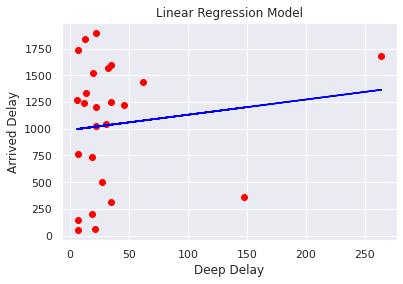

In [49]:
plt.scatter(X, y, color = "red")
plt.plot(X, lin_reg.predict(X), color = "blue")
plt.title("Linear Regression Model")
plt.xlabel("Deep Delay")
plt.ylabel("Arrived Delay")
plt.show()

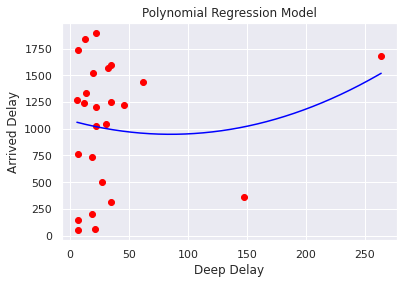

In [50]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color = "red")
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = "blue")
plt.title("Polynomial Regression Model")
plt.xlabel("Deep Delay")
plt.ylabel("Arrived Delay")
plt.show()